#Support Vector Machines

This Matlab code has been completed as part of [Machine Learning](https://www.coursera.org/learn/machine-learning)
course in Coursera given by Prof. Andrew Ng

------------
This note demonstrates the use of support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs

This notebook includes:

- <a href='#part1'>Part 1: Dataset 1</a>
- <a href='#part2'>Part 2: Dataset 2</a>
- <a href='#part3'>Part 3: Dataset 3</a> 

This code requires the following functions
* <a href='#funcs_08_SupportVectorMachine_svmTrain.m'>funcs_08_SupportVectorMachine_svmTrain.m</a> 
* <a href='#funcs_08_SupportVectorMachine_svmPredict.m'>funcs_08_SupportVectorMachine_svmPredict.m</a>

In [29]:
clear all; close all; clc; warning off;
addpath('./data/') % add path to directory containing data files
addpath('./funcs/') % add path to directory containing subfunction files

## Dataset 1 <a id='part1'></a>
Let start with a 2D example dataset which can be separated by a linear boundary.

### Visualizing Data

When visulazing the dataset, the positions of the positive examples (indicated with +) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example + on the far left at about (0.1, 4.1). We will also see how this outlier affects the SVM decision boundary.

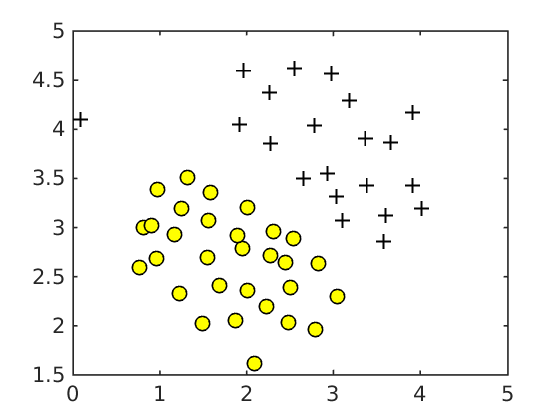

In [30]:
load('data_08_SuportVectorMachine_part1_linear.mat');

pos = find(y == 1); neg = find(y == 0);
hold on;
plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 1, 'MarkerSize', 7)
plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7)
hold off;
box on; 

###Training Linear SVM 

We will try using different values of the C parameter with SVMs. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to $1/\lambda$ , where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

Note that most SVM training function automatically adds the extra feature $x_0 = 1$ takes care of learning the intercept term $\theta_0$

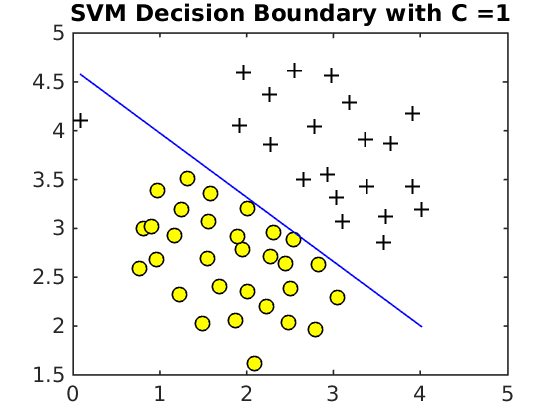

In [31]:
C = 1;
svm_model = funcs_08_SupportVectorMachine_svmTrain(X, y, C, @linearKernel, 1e-3, 20);
w = svm_model.w;
b = svm_model.b;
xp = linspace(min(X(:,1)), max(X(:,1)), 100);
yp = - (w(1)*xp + b)/w(2);

hold on;
plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 1, 'MarkerSize', 7)
plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7)
plot(xp, yp, '-b'); 
hold off
title(['SVM Decision Boundary with C =',num2str(C)])
box on

When C = 1, the SVM puts the decision boundary in the gap between the two datasets and *misclassifies* the data point on the far left.

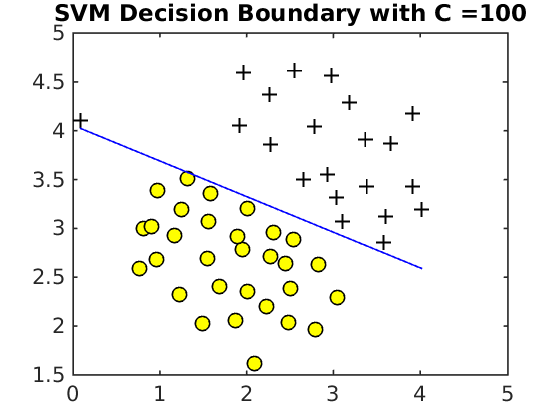

In [32]:
C = 100;
svm_model = funcs_08_SupportVectorMachine_svmTrain(X, y, C, @linearKernel, 1e-3, 20);
w = svm_model.w;
b = svm_model.b;
xp = linspace(min(X(:,1)), max(X(:,1)), 100);
yp = - (w(1)*xp + b)/w(2);

hold on;
plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 1, 'MarkerSize', 7)
plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7)
plot(xp, yp, '-b'); 
hold off
title(['SVM Decision Boundary with C =',num2str(C)])
box on

When C = 100, the SVM now classifies every single example correctly, but has a decision boundary that does not
appear to be a natural fit for the data.

## Dataset 2

### Visualizing dataset 2

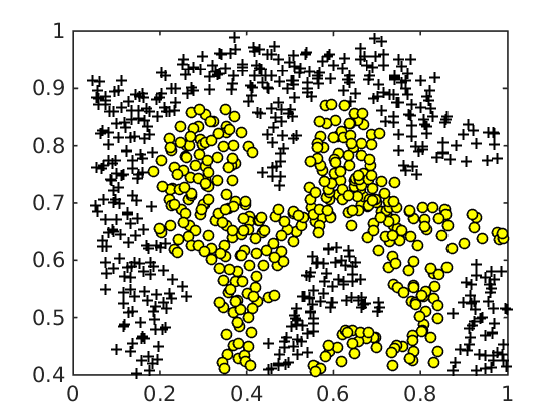

In [33]:
load('./data/data_08_SuportVectorMachine_part1_nonlinear.mat');

% Plot training data
pos = find(y == 1); neg = find(y == 0);
hold on;
plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 1, 'MarkerSize', 5)
plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 5)
hold off;
box on;

From the figure, we can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset.

### Training SVM with RBF Kernel

#### SVM with Gaussian Kernels

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples, $(x^{(i)} , x^{(j)} )$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.

The Gaussian kernel function is defined as:

$$K^{gauss}(x^{(i)} , x^{(j)} ) = exp \left( - \frac{\left\lVert  x^{(i)} - x^{(j)}  \right \rVert^2}{2\sigma^2} \right) = exp \left( - \frac{ \sum_{k=1}^{n}\left(  x^{(i)} - x^{(j)}  \right)^2}{2\sigma^2} \right)$$

In [34]:
gaussianKernel = @(x1, x2, sigma) exp(-sum((x1(:)-x2(:)).^2)/(2*sigma^2));

% We set the tolerance and max_passes lower here so that the code will run faster. However, in practice, 
% you will want to run the training to convergence.
C = 1; sigma = 0.1;
svm_model= funcs_08_SupportVectorMachine_svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); 

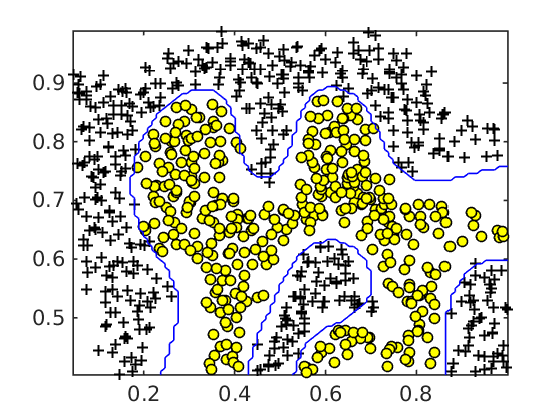

In [35]:
x1plot = linspace(min(X(:,1)), max(X(:,1)), 100)';
x2plot = linspace(min(X(:,2)), max(X(:,2)), 100)';
[X1, X2] = meshgrid(x1plot, x2plot);
vals = zeros(size(X1));
for i = 1:size(X1, 2)
   this_X = [X1(:, i), X2(:, i)];
   vals(:, i) = funcs_08_SupportVectorMachine_svmPredict(svm_model, this_X);
end

% Plot the SVM boundary
hold on
plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 1, 'MarkerSize', 5)
plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 5)
contour(X1, X2, vals, [0.01 0.01], 'Color', 'b');
hold off;
box on;

Figure 5 shows the decision boundary found by the SVM with a Gaussian kernel. The decision boundary is able to separate most of the positive and
negative examples correctly and follows the contours of the dataset well.

## Dataset 3

This dataset will give more practical insights on how to use a SVM with a Gaussian kernel. The data includes variables $(X, y)$ and  $(Xval, yval)$ for training and validation task. We will use the cross validation set $(Xval, yval)$ to determine the best $C$ and $\sigma$ parameter to use.

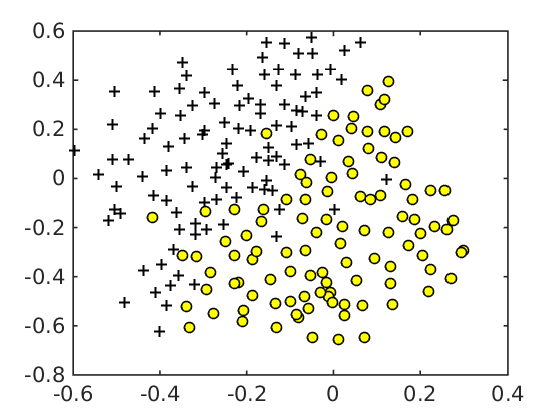

In [36]:
load('./data/data_08_SuportVectorMachine_part1_CV.mat');

% Plot training data
pos = find(y == 1); neg = find(y == 0);
hold on;
plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 1, 'MarkerSize', 5)
plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 5)
hold off;
box on;

 We will search over the parameters $C$ and $\sigma$ and find the best set of parameters depending on the performance of the classifier in the validation set.

In [37]:
C_all = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30];
sigma_all = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30];

errs=zeros(numel(C_all),numel(sigma_all));
for i=1:numel(C_all)
    for j=1:numel(sigma_all)
        model= funcs_08_SupportVectorMachine_svmTrain(X, y, C_all(i), @(x1, x2) gaussianKernel(x1, x2, sigma_all(j))); 
        Y_pred = funcs_08_SupportVectorMachine_svmPredict(model, Xval);
        errs(i,j)=mean(double(Y_pred ~= yval));
    end
end

[i_min,j_min]=find(errs==min(min(errs)));
C=C_all(i_min); sigma=sigma_all(j_min);

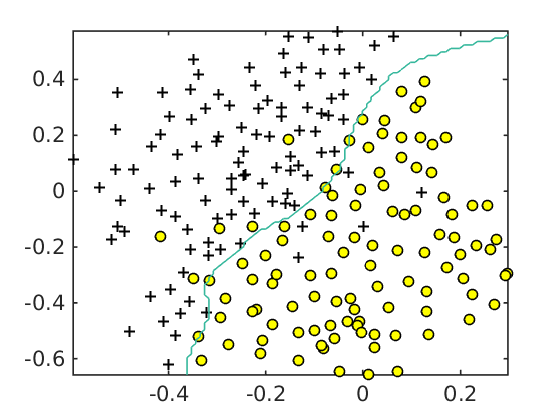

In [38]:
svm_model= funcs_08_SupportVectorMachine_svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma));

x1plot = linspace(min(X(:,1)), max(X(:,1)), 100)';
x2plot = linspace(min(X(:,2)), max(X(:,2)), 100)';
[X1, X2] = meshgrid(x1plot, x2plot);
vals = zeros(size(X1));
for i = 1:size(X1, 2)
   this_X = [X1(:, i), X2(:, i)];
   vals(:, i) = funcs_08_SupportVectorMachine_svmPredict(svm_model, this_X);
end

% Plot the SVM boundary
hold on
plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 1, 'MarkerSize', 5)
plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 5)

contour(X1, X2, vals, [0.0001,0.0001]);
hold off;
box on;

#### funcs_08_SupportVectorMachine_svmTrain.m <a id='funcs_08_SupportVectorMachine_svmTrain.m'></a>

In [39]:
% function [model] = funcs_08_SupportVectorMachine_svmTrain(X, Y, C, kernelFunction, ...
%                             tol, max_passes)
% %SVMTRAIN Trains an SVM classifier using a simplified version of the SMO 
% %algorithm. 
% %   [model] = SVMTRAIN(X, Y, C, kernelFunction, tol, max_passes) trains an
% %   SVM classifier and returns trained model. X is the matrix of training 
% %   examples.  Each row is a training example, and the jth column holds the 
% %   jth feature.  Y is a column matrix containing 1 for positive examples 
% %   and 0 for negative examples.  C is the standard SVM regularization 
% %   parameter.  tol is a tolerance value used for determining equality of 
% %   floating point numbers. max_passes controls the number of iterations
% %   over the dataset (without changes to alpha) before the algorithm quits.
% %
% % Note: This is a simplified version of the SMO algorithm for training
% %       SVMs. In practice, if you want to train an SVM classifier, we
% %       recommend using an optimized package such as:  
% %
% %           LIBSVM   (http://www.csie.ntu.edu.tw/~cjlin/libsvm/)
% %           SVMLight (http://svmlight.joachims.org/)
% %
% %
% 
% if ~exist('tol', 'var') || isempty(tol)
%     tol = 1e-3;
% end
% 
% if ~exist('max_passes', 'var') || isempty(max_passes)
%     max_passes = 5;
% end
% 
% % Data parameters
% m = size(X, 1);
% n = size(X, 2);
% 
% % Map 0 to -1
% Y(Y==0) = -1;
% 
% % Variables
% alphas = zeros(m, 1);
% b = 0;
% E = zeros(m, 1);
% passes = 0;
% eta = 0;
% L = 0;
% H = 0;
% 
% % Pre-compute the Kernel Matrix since our dataset is small
% % (in practice, optimized SVM packages that handle large datasets
% %  gracefully will _not_ do this)
% % 
% % We have implemented optimized vectorized version of the Kernels here so
% % that the svm training will run faster.
% if strcmp(func2str(kernelFunction), 'linearKernel')
%     % Vectorized computation for the Linear Kernel
%     % This is equivalent to computing the kernel on every pair of examples
%     K = X*X';
% elseif strfind(func2str(kernelFunction), 'gaussianKernel')
%     % Vectorized RBF Kernel
%     % This is equivalent to computing the kernel on every pair of examples
%     X2 = sum(X.^2, 2);
%     K = bsxfun(@plus, X2, bsxfun(@plus, X2', - 2 * (X * X')));
%     K = kernelFunction(1, 0) .^ K;
% else
%     % Pre-compute the Kernel Matrix
%     % The following can be slow due to the lack of vectorization
%     K = zeros(m);
%     for i = 1:m
%         for j = i:m
%              K(i,j) = kernelFunction(X(i,:)', X(j,:)');
%              K(j,i) = K(i,j); %the matrix is symmetric
%         end
%     end
% end
% 
% % Train
% while passes < max_passes,      
%     num_changed_alphas = 0;
%     for i = 1:m,
%         
%         % Calculate Ei = f(x(i)) - y(i) using (2). 
%         % E(i) = b + sum (X(i, :) * (repmat(alphas.*Y,1,n).*X)') - Y(i);
%         E(i) = b + sum (alphas.*Y.*K(:,i)) - Y(i);
%         
%         if ((Y(i)*E(i) < -tol && alphas(i) < C) || (Y(i)*E(i) > tol && alphas(i) > 0)),
%             
%             % In practice, there are many heuristics one can use to select
%             % the i and j. In this simplified code, we select them randomly.
%             j = ceil(m * rand());
%             while j == i,  % Make sure i \neq j
%                 j = ceil(m * rand());
%             end
% 
%             % Calculate Ej = f(x(j)) - y(j) using (2).
%             E(j) = b + sum (alphas.*Y.*K(:,j)) - Y(j);
% 
%             % Save old alphas
%             alpha_i_old = alphas(i);
%             alpha_j_old = alphas(j);
%             
%             % Compute L and H by (10) or (11). 
%             if (Y(i) == Y(j)),
%                 L = max(0, alphas(j) + alphas(i) - C);
%                 H = min(C, alphas(j) + alphas(i));
%             else
%                 L = max(0, alphas(j) - alphas(i));
%                 H = min(C, C + alphas(j) - alphas(i));
%             end
%            
%             if (L == H),
%                 % continue to next i. 
%                 continue;
%             end
% 
%             % Compute eta by (14).
%             eta = 2 * K(i,j) - K(i,i) - K(j,j);
%             if (eta >= 0),
%                 % continue to next i. 
%                 continue;
%             end
%             
%             % Compute and clip new value for alpha j using (12) and (15).
%             alphas(j) = alphas(j) - (Y(j) * (E(i) - E(j))) / eta;
%             
%             % Clip
%             alphas(j) = min (H, alphas(j));
%             alphas(j) = max (L, alphas(j));
%             
%             % Check if change in alpha is significant
%             if (abs(alphas(j) - alpha_j_old) < tol),
%                 % continue to next i. 
%                 % replace anyway
%                 alphas(j) = alpha_j_old;
%                 continue;
%             end
%             
%             % Determine value for alpha i using (16). 
%             alphas(i) = alphas(i) + Y(i)*Y(j)*(alpha_j_old - alphas(j));
%             
%             % Compute b1 and b2 using (17) and (18) respectively. 
%             b1 = b - E(i) ...
%                  - Y(i) * (alphas(i) - alpha_i_old) *  K(i,j)' ...
%                  - Y(j) * (alphas(j) - alpha_j_old) *  K(i,j)';
%             b2 = b - E(j) ...
%                  - Y(i) * (alphas(i) - alpha_i_old) *  K(i,j)' ...
%                  - Y(j) * (alphas(j) - alpha_j_old) *  K(j,j)';
% 
%             % Compute b by (19). 
%             if (0 < alphas(i) && alphas(i) < C),
%                 b = b1;
%             elseif (0 < alphas(j) && alphas(j) < C),
%                 b = b2;
%             else
%                 b = (b1+b2)/2;
%             end
% 
%             num_changed_alphas = num_changed_alphas + 1;
% 
%         end
%         
%     end
%     
%     if (num_changed_alphas == 0),
%         passes = passes + 1;
%     else
%         passes = 0;
%     end
% 
%     if exist('OCTAVE_VERSION')
%         fflush(stdout);
%     end
% end
% 
% % Save the model
% idx = alphas > 0;
% model.X= X(idx,:);
% model.y= Y(idx);
% model.kernelFunction = kernelFunction;
% model.b= b;
% model.alphas= alphas(idx);
% model.w = ((alphas.*Y)'*X)';
% 
% end


#### funcs_08_SupportVectorMachine_svmPredict.m <a id='funcs_08_SupportVectorMachine_svmPredict.m'></a>

In [40]:
% function pred = funcs_08_SupportVectorMachine_svmPredict(model, X)
% %SVMPREDICT returns a vector of predictions using a trained SVM model
% %(svmTrain). 
% %   pred = SVMPREDICT(model, X) returns a vector of predictions using a 
% %   trained SVM model (svmTrain). X is a mxn matrix where there each 
% %   example is a row. model is a svm model returned from svmTrain.
% %   predictions pred is a m x 1 column of predictions of {0, 1} values.
% %
% 
% % Check if we are getting a column vector, if so, then assume that we only
% % need to do prediction for a single example
% if (size(X, 2) == 1)
%     % Examples should be in rows
%     X = X';
% end
% 
% % Dataset 
% m = size(X, 1);
% p = zeros(m, 1);
% pred = zeros(m, 1);
% 
% if strcmp(func2str(model.kernelFunction), 'linearKernel')
%     % We can use the weights and bias directly if working with the 
%     % linear kernel
%     p = X * model.w + model.b;
% elseif strfind(func2str(model.kernelFunction), 'gaussianKernel')
%     % Vectorized RBF Kernel
%     % This is equivalent to computing the kernel on every pair of examples
%     X1 = sum(X.^2, 2);
%     X2 = sum(model.X.^2, 2)';
%     K = bsxfun(@plus, X1, bsxfun(@plus, X2, - 2 * X * model.X'));
%     K = model.kernelFunction(1, 0) .^ K;
%     K = bsxfun(@times, model.y', K);
%     K = bsxfun(@times, model.alphas', K);
%     p = sum(K, 2);
% else
%     % Other Non-linear kernel
%     for i = 1:m
%         prediction = 0;
%         for j = 1:size(model.X, 1)
%             prediction = prediction + ...
%                 model.alphas(j) * model.y(j) * ...
%                 model.kernelFunction(X(i,:)', model.X(j,:)');
%         end
%         p(i) = prediction + model.b;
%     end
% end
% 
% % Convert predictions into 0 / 1
% pred(p >= 0) =  1;
% pred(p <  0) =  0;
% 
% end